## Import dependencies

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

### Read raw data

In [2]:
# Load raw data
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Read first five rows of dataframe
# df.head()

## Data Cleaning

### Check for missing data

In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Convert 'TotalCharges' and 'MonthlyCharges' to float

In [4]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: 0.0 if x == ' ' else float(x))

## Feature Engineering

### One-Hot Encode Features

In [5]:
# Encode binary features
df['gender_encoded'] = df['gender'].apply(lambda x: 0 if x == "Female" else 1)
df['Partner_encoded'] = df['Partner'].apply(lambda x: 0 if x == "No" else 1)
df['Dependents_encoded'] = df['Dependents'].apply(lambda x: 0 if x == "No" else 1)
df['PhoneService_encoded'] = df['PhoneService'].apply(lambda x: 0 if x == "No" else 1)
df['PaperlessBilling_encoded'] = df['PaperlessBilling'].apply(lambda x: 0 if x == "No" else 1)
df['Churn_encoded'] = df['Churn'].apply(lambda x: 0 if x == "No" else 1)

### Label Encode Features

In [6]:
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns", None)

features_to_label_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                            'DeviceProtection',  'TechSupport', 'StreamingTV', 'StreamingMovies',
                             'Contract', 'PaymentMethod',]

def apply_label_encoding(df, list_features):
    le = LabelEncoder()

    for feature in list_features:
        df[f'{feature}_encoded'] = le.fit_transform(df[feature])
    
    return df

apply_label_encoding(df, features_to_label_encode)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,PaperlessBilling_encoded,Churn_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaymentMethod_encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1,0,1,0,0,2,0,0,0,0,0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0,1,0,0,0,0,2,0,2,0,0,0,1,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,1,1,0,0,2,2,0,0,0,0,0,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0,0,1,0,2,0,2,2,0,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1,0,2,0,2,0,2,2,2,2,1,3
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1,0,2,1,0,2,2,0,2,2,1,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,1,1,0,1,0,1,0,2,0,0,0,0,0,0,2
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,1,0,1,1,1,2,1,0,0,0,0,0,0,0,3


## Feature Selection 

In [7]:
# Recreate dataframe with
df_features = df[['Churn_encoded', 'gender_encoded','SeniorCitizen', 'Partner_encoded', 'Dependents_encoded',
                  'tenure', 'PhoneService_encoded', 'MultipleLines_encoded', 'InternetService_encoded',
                  'OnlineSecurity_encoded', 'OnlineBackup_encoded', 'DeviceProtection_encoded', 'TechSupport_encoded',
                  'StreamingTV_encoded', 'StreamingMovies_encoded', 'Contract_encoded','PaperlessBilling_encoded',
                  'PaymentMethod_encoded','MonthlyCharges', 'TotalCharges',
                  ]].copy()

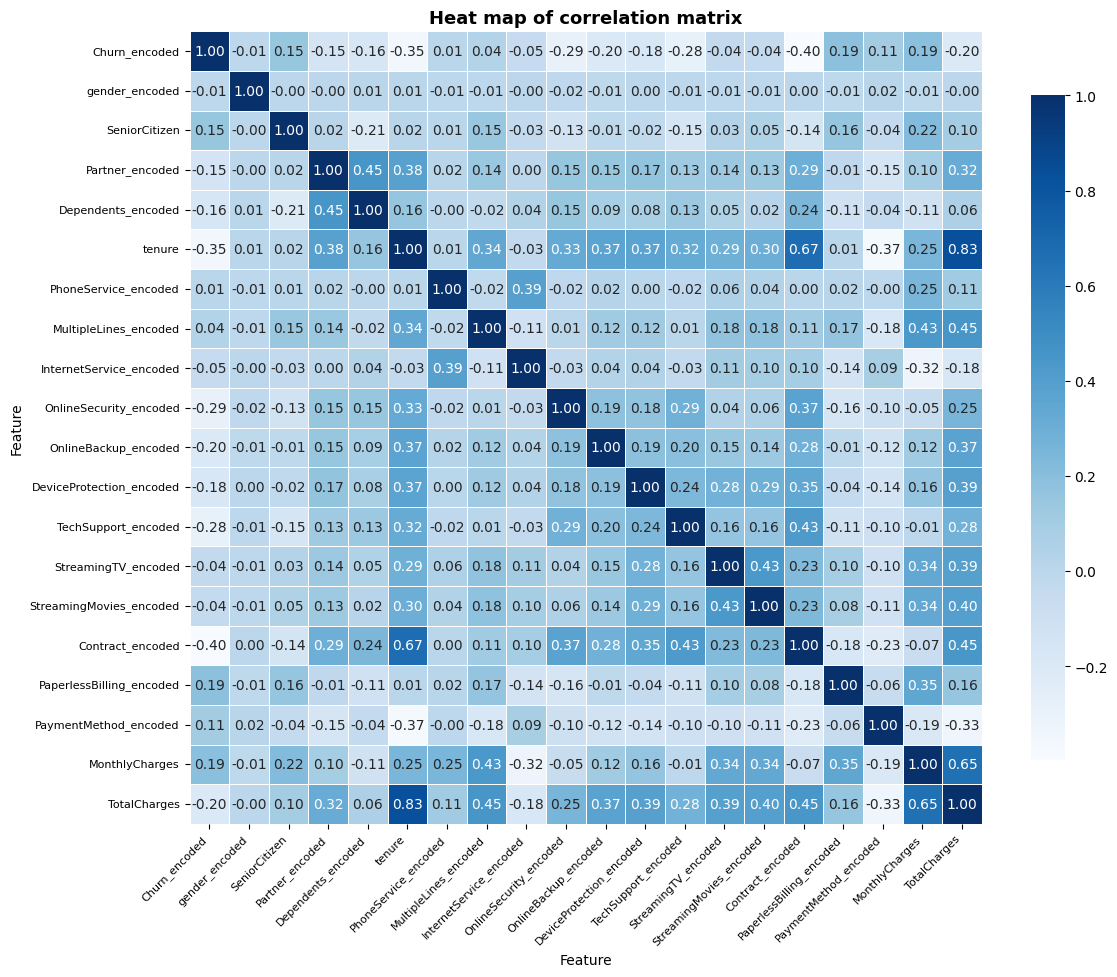

In [8]:
# Reset the index to ensure sequential indexing
df_features = df_features.reset_index(drop=True)

plt.figure(figsize=(12, 10))
sns.heatmap(df_features.corr(), 
            annot=True,
            cmap="Blues",
            fmt=".2f",
            linewidths=.5,
            square=True,
            cbar_kws={"shrink": .8}
        )

# Add labels, title, and adjust axes params
plt.title("Heat map of correlation matrix", fontsize=13, weight="bold")
plt.xlabel('Feature', fontsize=10)
plt.ylabel('Feature', fontsize=10)
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [9]:
# Less important features
less_important_features = ['gender_encoded', 'PhoneService_encoded', 'MultipleLines_encoded', 
                           'InternetService_encoded','StreamingTV_encoded', 'StreamingMovies_encoded',]

# Important features
selected_final_df = ['Churn_encoded', 'SeniorCitizen', 'Partner_encoded',
                                'Dependents_encoded', 'tenure', 'OnlineSecurity_encoded', 'OnlineBackup_encoded',
                                'DeviceProtection_encoded', 'TechSupport_encoded','Contract_encoded',
                                'PaperlessBilling_encoded', 'PaymentMethod_encoded', 'MonthlyCharges',
                                'TotalCharges']



## Cutting not important features

In [10]:
final_df = df_features.drop(less_important_features, axis=1)

# final_df = df_features.copy()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

2025-05-22 10:01:28.674832: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Preparing data

In [12]:
X = final_df.drop(columns=["Churn_encoded"])
y = final_df["Churn_encoded"]

In [13]:
# Séparation train/val/test (80/20 puis 20% de train pour val)
X_train_0, X_test, y_train_0, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# On prend 20% de X_train pour validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_0, y_train_0, test_size=0.2, random_state=42, stratify=y_train_0)

### Class weight for Churn

In [14]:
# Add class weights for target
classes = np.unique(y)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_0)
class_weights = dict(zip(classes, weights))

### Model definition

In [15]:
def build_model():
    # Réseau avec 2 couches cachées de 64 neurones chacune
    # et une couche de sortie avec activation sigmoid pour classification
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Définition de la fonction de perte, de l'optimiseur et des métriques
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    model.summary()

    return model

In [16]:
model = build_model()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [17]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=60,
    batch_size=128,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/60


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2697 - loss: 70.7124 - val_accuracy: 0.2653 - val_loss: 65.3956
Epoch 2/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2669 - loss: 34.8024 - val_accuracy: 0.2662 - val_loss: 9.8943
Epoch 3/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4177 - loss: 3.7132 - val_accuracy: 0.4933 - val_loss: 2.9421
Epoch 4/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4624 - loss: 2.4961 - val_accuracy: 0.4720 - val_loss: 2.9506
Epoch 5/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4542 - loss: 2.3326 - val_accuracy: 0.4774 - val_loss: 2.7376
Epoch 6/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4495 - loss: 2.1542 - val_accuracy: 0.4783 - val_loss: 2.3899
Epoch 7/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4590 - loss: 1.8003 - val_accuracy: 0.4437 - val_loss: 2.1457
Epoch 8/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4436 - loss: 1.6379 - val_accuracy: 0.4916 - val_loss: 1.8435

In [18]:
history.history

{'accuracy': [0.26536497473716736,
  0.26558685302734375,
  0.48480141162872314,
  0.44575104117393494,
  0.44974485039711,
  0.45573553442955017,
  0.45928555727005005,
  0.44841358065605164,
  0.45662301778793335,
  0.4608387053012848,
  0.4612824618816376,
  0.465719997882843,
  0.4750388264656067,
  0.4808076322078705,
  0.4921233654022217,
  0.49301087856292725,
  0.5045484900474548,
  0.5154204368591309,
  0.5165298581123352,
  0.5455957651138306,
  0.5518082976341248,
  0.5728866457939148,
  0.5839805006980896,
  0.5984025001525879,
  0.6336809396743774,
  0.6534280180931091,
  0.6720656752586365,
  0.7044597268104553,
  0.7211005091667175,
  0.7237630486488342,
  0.7328599691390991,
  0.7100066542625427,
  0.7248724102973938,
  0.7355225086212158,
  0.7337474822998047,
  0.7275349497795105,
  0.7401819229125977,
  0.7333037257194519,
  0.7328599691390991,
  0.741291344165802,
  0.7319725155830383,
  0.7408475875854492,
  0.734856903553009,
  0.7248724102973938,
  0.739294409751

### Evaluation

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAccuracy on test set : {test_acc:.4f}")


Accuracy on test set : 0.7743


In [20]:
y_pred_probs = model.predict(X_test)

probs = y_pred_probs.ravel()

y_pred = (probs >= 0.7)
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1035
           1       0.65      0.42      0.51       374

    accuracy                           0.79      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409



In [21]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, probs)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.8263


In [22]:

print("min, max, mean:", probs.min(), probs.max(), probs.mean())


min, max, mean: 0.003748516 0.9710904 0.32646352


### Confusion matrix

In [23]:
print("Confusion matrix :")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion matrix :
[[949  86]
 [216 158]]


### Learning curves vizualisation

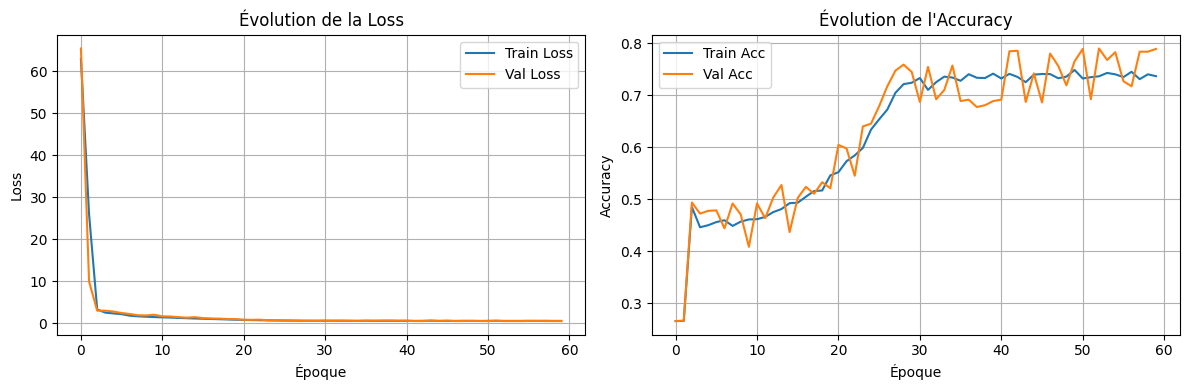

In [24]:
def plot_loss_acc(history, validation=True):
    """
    Trace la loss et l'accuracy du modèle pendant l'entraînement.
    """
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    if validation and 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Évolution de la Loss')
    plt.xlabel('Époque')
    plt.ylabel('Loss') 
    plt.legend()
    plt.grid()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    if validation and 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title("Évolution de l'Accuracy")
    plt.xlabel('Époque')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
    
plot_loss_acc(history)

## Callbacks

In [25]:
import os
import datetime

In [26]:
# Pour reset complètement :
tf.keras.backend.clear_session()   # libère la mémoire, supprime le graph actuel
model = build_model()             # nouvelle instance, poids ré-initialisés

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

### EarlyStopping

In [27]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',    # surveille la perte de validation
    patience=3,            # tolère 3 époques sans amélioration
    restore_best_weights=True
)

### ModelCheckpoint

In [28]:
checkpoint_path = "checkpoints/churn_best.keras"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
model_ckpt = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',  # sauvegarde le modèle qui maximise l’accuracy de validation
    save_best_only=True,
    verbose=1
)

### TensorBoard

In [29]:
%load_ext tensorboard

In [30]:
log_dir = os.path.join(
    "logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
)
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,       # enregistre les histogrammes de poids chaque époque
    write_graph=True,       # sauvegarde le graph du modèle
    write_images=True
)

In [31]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop, model_ckpt, tensorboard_cb]
)

Epoch 1/20
208/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7472 - loss: 43.7782
Epoch 1: val_accuracy improved from -inf to 0.57982, saving model to checkpoints/churn_best.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7426 - loss: 42.4346 - val_accuracy: 0.5798 - val_loss: 0.8120
Epoch 2/20
220/226 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6098 - loss: 0.7860
Epoch 2: val_accuracy did not improve from 0.57982
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6113 - loss: 0.7836 - val_accuracy: 0.5388 - val_loss: 0.7580
Epoch 3/20
214/226 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7138 - loss: 0.6243
Epoch 3: val_accuracy improved from 0.57982 to 0.76164, saving model to checkpoints/churn_best.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7150 - loss: 0.6222 - val_accuracy: 0.7616 - val_loss: 0.4983
Epoch 4/20
211/226 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7427 - loss: 0.5653
Epoch 4: val_accuracy did not improve from 0.76164
22

In [32]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAccuracy sur le test set : {test_acc:.4f}")
y_pred_probs = model.predict(X_test)

probs = y_pred_probs.ravel()

y_pred = (probs >= 0.7)
print("\nClassification Report :")
print(classification_report(y_test, y_pred))
print("Matrice de Confusion :")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy sur le test set : 0.7644
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1035
           1       0.70      0.25      0.37       374

    accuracy                           0.77      1409
   macro avg       0.74      0.61      0.62      1409
weighted avg       0.76      0.77      0.73      1409

Matrice de Confusion :
[[994  41]
 [279  95]]


In [33]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, probs)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.8101


In [34]:
%tensorboard --logdir logs/fit